## Import Required Libraries

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load the Cleaned Data

In [4]:
# Load data
df = pd.read_csv("../data/bank_cleaned.csv")

# Copy to avoid modifying original
data = df.copy()

data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Select the Features for Clustering

In [5]:
# Drop target column if it exists
X = data.drop(columns=['deposit'], errors='ignore')

# Standardize features (helps with distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Create a Dendrogram (to Choose Number of Clusters)

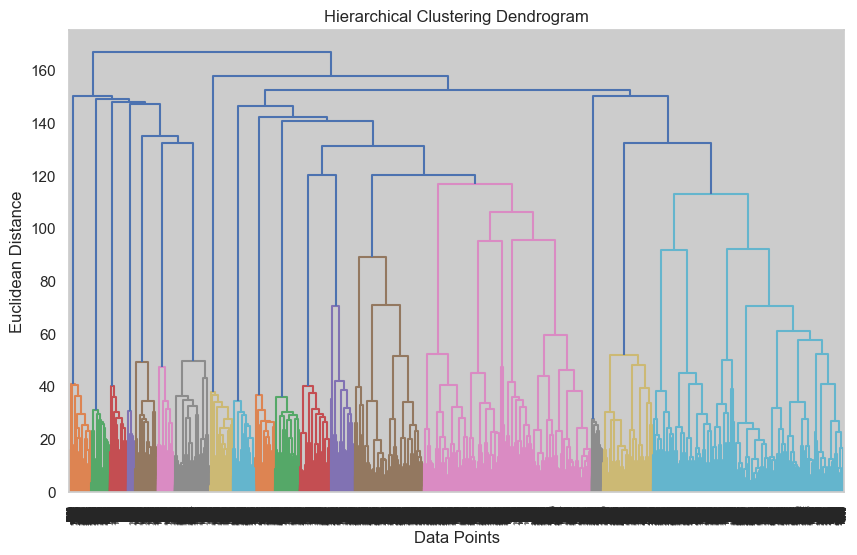

In [6]:
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Fit Hierarchical Clustering Model

In [8]:
n_clusters = 3  # based on dendrogram

hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Add cluster labels to dataframe
data['Cluster'] = labels
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0


## Evaluate Cluster Quality

In [9]:
silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

Silhouette Score: 0.142
Calinski-Harabasz Index: 369.539
Davies-Bouldin Index: 3.476


## Visualize Clusters (PCA to 2D)

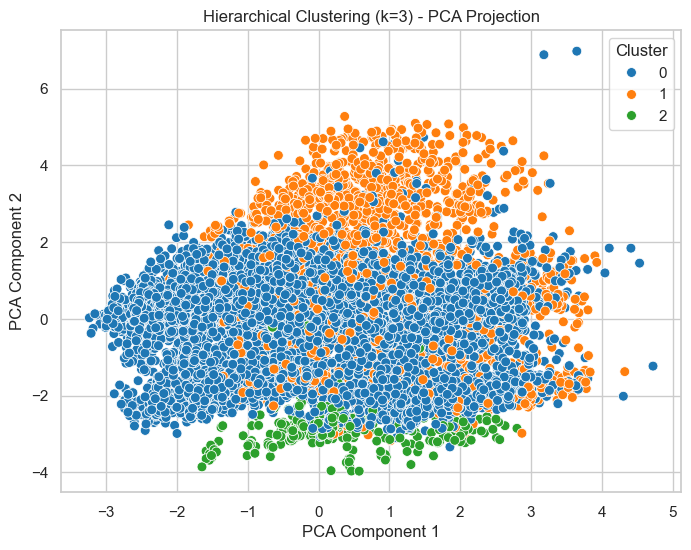

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=50)
plt.title(f'Hierarchical Clustering (k={n_clusters}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()